In [20]:
import os
from pdf2image import convert_from_path
from PIL import Image, ImageFilter
import pytesseract

# Path to your scanned textbook PDF
PDF_PATH = "/Users/minhajulhoque/work/github/mcps/genki_mcp/data/Genki Textbook 2nd Edition.pdf"

## Regular Parsing

In [2]:
# If Tesseract is not in PATH, specify it
# pytesseract.pytesseract.tesseract_cmd = r"/usr/local/bin/tesseract"

# Convert PDF to images (you can batch this if memory is a concern)
print("Converting PDF pages to images...")
pages = convert_from_path(PDF_PATH, dpi=300)

print(f"Total pages: {len(pages)}")

Converting PDF pages to images...
Total pages: 383


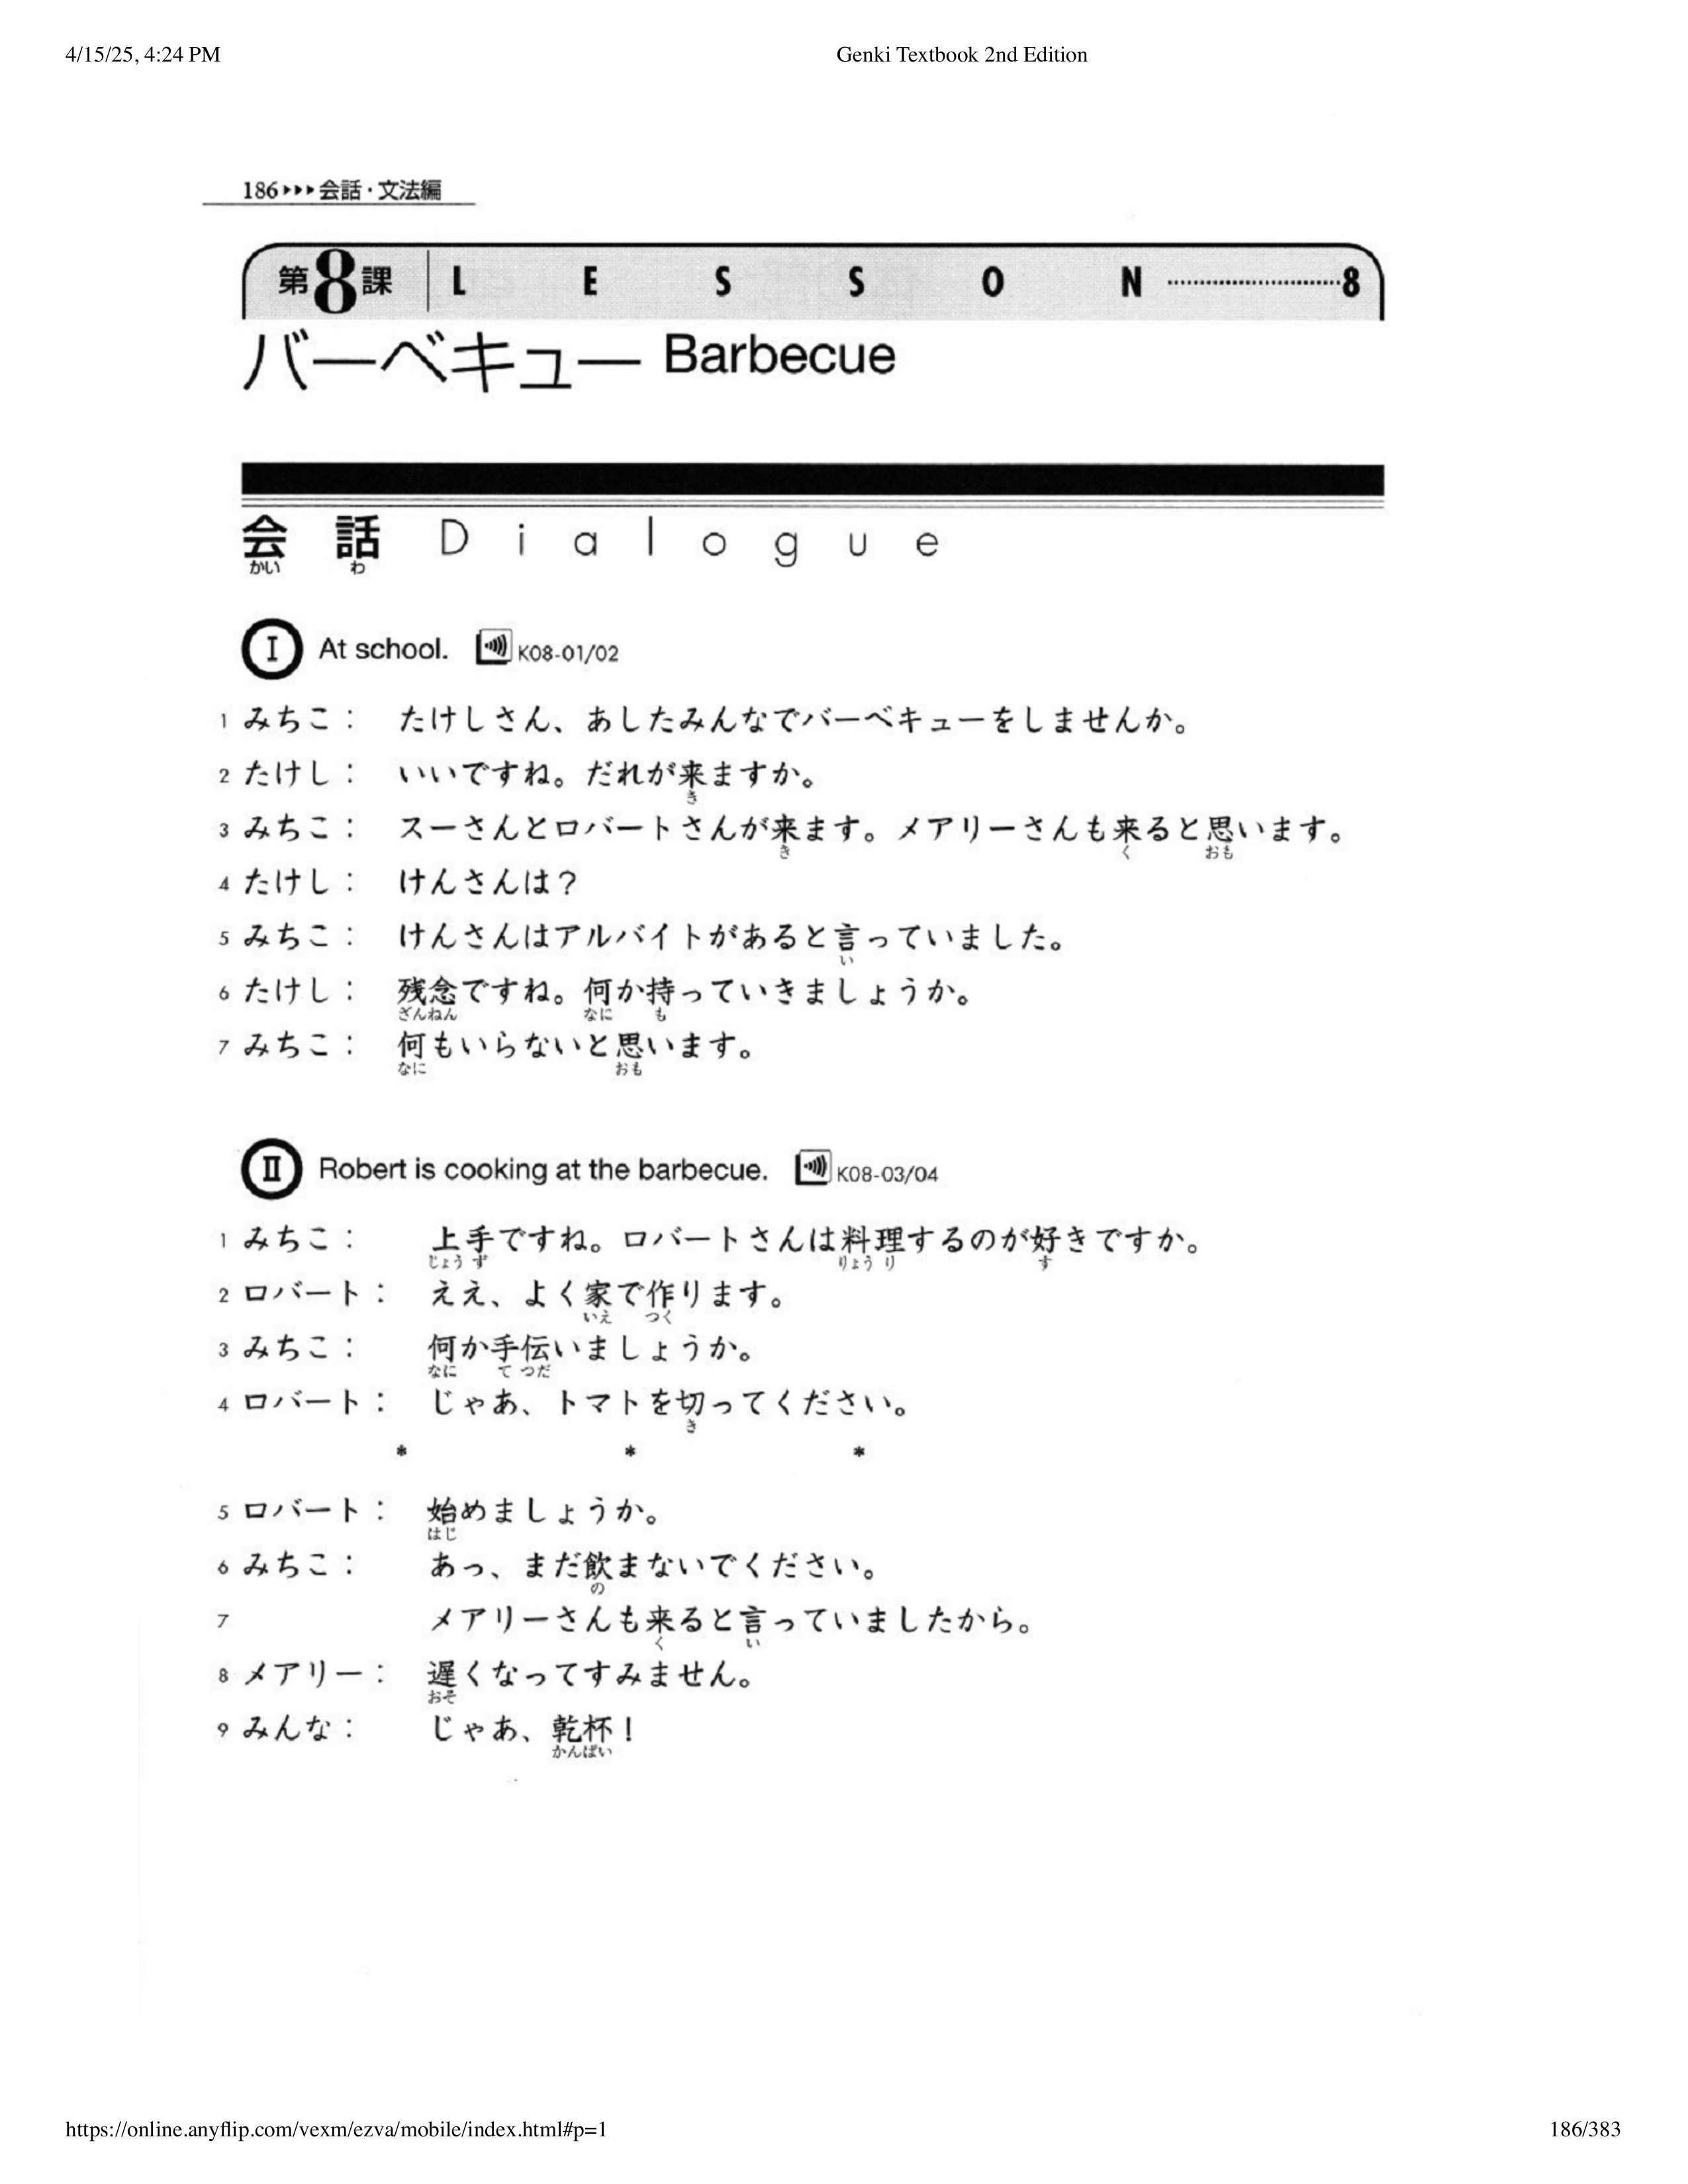

In [14]:
pages[186-1]

### Saving the PDF Images

In [34]:
# Save PIL Images under /data/pdf_images/
import os

def save_images_to_directory(images, output_dir="../data/pdf_images/"):
    os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

    for idx, img in enumerate(images):
        image_path = os.path.join(output_dir, f"page_{idx + 1}.png")
        img.save(image_path, format="PNG")
        print(f"Saved: {image_path}")

save_images_to_directory(pages)

Saved: ../data/pdf_images/page_1.png
Saved: ../data/pdf_images/page_2.png
Saved: ../data/pdf_images/page_3.png
Saved: ../data/pdf_images/page_4.png
Saved: ../data/pdf_images/page_5.png
Saved: ../data/pdf_images/page_6.png
Saved: ../data/pdf_images/page_7.png
Saved: ../data/pdf_images/page_8.png
Saved: ../data/pdf_images/page_9.png
Saved: ../data/pdf_images/page_10.png
Saved: ../data/pdf_images/page_11.png
Saved: ../data/pdf_images/page_12.png
Saved: ../data/pdf_images/page_13.png
Saved: ../data/pdf_images/page_14.png
Saved: ../data/pdf_images/page_15.png
Saved: ../data/pdf_images/page_16.png
Saved: ../data/pdf_images/page_17.png
Saved: ../data/pdf_images/page_18.png
Saved: ../data/pdf_images/page_19.png
Saved: ../data/pdf_images/page_20.png
Saved: ../data/pdf_images/page_21.png
Saved: ../data/pdf_images/page_22.png
Saved: ../data/pdf_images/page_23.png
Saved: ../data/pdf_images/page_24.png
Saved: ../data/pdf_images/page_25.png
Saved: ../data/pdf_images/page_26.png
Saved: ../data/pdf_im

In [ ]:
all_text = []

for i, page in enumerate(pages[:37]):  # Limit to first 27 pages
    print(f"OCR on page {i + 1}/{min(len(pages), 37)}")  # Adjust the print statement
    
    # Convert page to grayscale image
    gray_page = page.convert("L")

    # OCR to extract text
    text = pytesseract.image_to_string(gray_page)

    all_text.append(f"\n\n--- Page {i+1} ---\n{text}")

Processing page 1/383
Processing page 2/383
Processing page 3/383
Processing page 4/383
Processing page 5/383
Processing page 6/383
Processing page 7/383
Processing page 8/383
Processing page 9/383
Processing page 10/383
Processing page 11/383
Processing page 12/383
Processing page 13/383
Processing page 14/383
Processing page 15/383
Processing page 16/383
Processing page 17/383
Processing page 18/383
Processing page 19/383
Processing page 20/383
Processing page 21/383
Processing page 22/383
Processing page 23/383
Processing page 24/383
Processing page 25/383
Processing page 26/383
Processing page 27/383
Processing page 28/383
Processing page 29/383
Processing page 30/383
Processing page 31/383
Processing page 32/383
Processing page 33/383
Processing page 34/383
Processing page 35/383
Processing page 36/383
Processing page 37/383


In [18]:
print(all_text[34])



--- Page 35 ---
4/15/25, 4:24 PM

SILL ©

SEF OFVETF.
—AlSBlz.

~AIZA IL.

I is ea
BTA).
SYS CXWFTT.
FAFA.

VYUYA
WotTeET.
WoTholrt.,
PT2\E 6

BHA (HX).
WEEIETS

= S29 2 CELA).

UMHELT.
L4ALK BHNAWLET.

https://online.anyflip.com/vexm/ezva/mobile/index.html#p=1

Genki Textbook 2nd Edition

Ohayoo.

Ohayoo gozaimasu.

Konnichiwa.
Konbanwa.
Sayoonara.
Oyasumi(nasai).
Arigatoo.

Arigatoo gozaimasu.

Sumimasen.
lie.
Ittekimasu.
Itterasshai.
Tadaima.
Okaeri(nasai).
Itadakimasu.

Gochisoosama(deshita).

Hajimemashite.

BAD >>> 35

lLUHELT.
LAL< BNA

Good morning.

Good morning. (polite)
Good afternoon.

Good evening.
Good-bye.

Good night.

Thank you.

Thank you. (polite)
Excuse me,; I’m sorry.
No.; Not at all.

I'll go and come back.
Please go and come back.
I’m home.

Welcome home.

Thank you for the meal.
(before eating)

Thank you for the meal.
(after eating)

How do you do?

Yoroshiku onegaishimasu. Nice to meet you.

35/383



In [ ]:
# Save all extracted text to a file
with open(OUTPUT_TEXT_PATH, "w", encoding="utf-8") as f:
    f.write("\n".join(all_text))

print(f"Text extracted and saved to {OUTPUT_TEXT_PATH}")

## Language Specific Parsing

In [ ]:
all_text = []

for i, page in enumerate(pages[:37]):  # Limit to first 27 pages
    print(f"OCR on page {i + 1}/{min(len(pages), 37)}")  # Adjust the print statement

    # Convert to grayscale
    img = page.convert("L")

    # Optional: Image cleanup (denoise, sharpen)
    img = img.filter(ImageFilter.SHARPEN)

    # OCR with English + Japanese
    text = pytesseract.image_to_string(img, lang='eng+jpn')

    all_text.append(f"\n\n--- Page {i+1} ---\n{text}")

OCR on page 1/383
OCR on page 2/383
OCR on page 3/383
OCR on page 4/383
OCR on page 5/383
OCR on page 6/383
OCR on page 7/383
OCR on page 8/383
OCR on page 9/383
OCR on page 10/383
OCR on page 11/383
OCR on page 12/383
OCR on page 13/383
OCR on page 14/383
OCR on page 15/383
OCR on page 16/383
OCR on page 17/383
OCR on page 18/383
OCR on page 19/383
OCR on page 20/383
OCR on page 21/383
OCR on page 22/383
OCR on page 23/383
OCR on page 24/383
OCR on page 25/383
OCR on page 26/383
OCR on page 27/383
OCR on page 28/383
OCR on page 29/383
OCR on page 30/383
OCR on page 31/383
OCR on page 32/383
OCR on page 33/383
OCR on page 34/383
OCR on page 35/383
OCR on page 36/383
OCR on page 37/383
OCR on page 38/383
OCR on page 39/383
OCR on page 40/383
OCR on page 41/383
OCR on page 42/383
OCR on page 43/383
OCR on page 44/383
OCR on page 45/383
OCR on page 46/383
OCR on page 47/383
OCR on page 48/383
OCR on page 49/383
OCR on page 50/383
OCR on page 51/383
OCR on page 52/383
OCR on page 53/383
OC

In [23]:
print(all_text[34])



--- Page 35 ---
4/15/25, 4:24 PM

お は よう 。

お は よう ご ざい ます 。
こん に 放 ほ 。
こん ば ん は 。

きよ ポ が がち 。

お や すみ (な さい )。
あり が どす う 9 こざ いま す 。
すみ ませ ん 。

\ い \\ え 。

NN らき ます 。
いっ て らっし ゃ い 。

た だ いま 。

お か えり (な さい )。
Woes 29

ご ち 才 うさ ま ( で し た )。

ZUSe Ut.
よろ し く お ね が いし ます 。

https://online.anyflip.com/vexm/ezva/mobile/index.html#p=1

Genki Textbook 2nd Edition

Ohayoo.

Ohayoo gozaimasu.
Konnichiwa.
Konbanwa.
Sayoonara.
Oyasumi(nasai).
Arigatoo.

Arigatoo gozaimasu.

Sumimasen.
lie.
Ittekimasu.
ltterasshai.
Tadaima.
Okaeri(nasai).
ltadakimasu.

Gochisoosama(deshita).

Hajimemashite.

BLED >>> 35

いた だ きま す 。

は じ め ま し て 。
よろ し く お ね が い

Good morning.

Good morning. (polite)
Good afternoon.

Good evening.
Good-bye.

Good night.

Thank you.

Thank you. (polite)
Excuse me I’m sorry.
No.; Not at all.

Tll go and come back.
Please go and come back.
I’m home.

Welcome home.

Thank you for the meal.
(before eating)

Thank you for the meal.
(after eating)

How do you do?

Yoroshiku onegaishi

In [ ]:
# Save output
with open(OUTPUT_TEXT_PATH, "w", encoding="utf-8") as f:
    f.write("\n".join(all_text))

print(f"Finished! Text saved to {OUTPUT_TEXT_PATH}")

## Layout Parsing

In [31]:
all_text = []

for i, page in enumerate(pages[:37]):  # Limit to first 27 pages
    print(f"OCR on page {i + 1}/{min(len(pages), 37)}")  # Adjust the print statement

    img = page.convert("L")

    # Optional image cleanup
    img = img.filter(ImageFilter.SHARPEN)

    # Use layout preserving config
    text = pytesseract.image_to_string(img, lang='eng+jpn', config='--psm 4')

    all_text.append(f"\n\n--- Page {i+1} ---\n{text}")

OCR on page 1/37
OCR on page 2/37
OCR on page 3/37
OCR on page 4/37
OCR on page 5/37
OCR on page 6/37
OCR on page 7/37
OCR on page 8/37
OCR on page 9/37
OCR on page 10/37
OCR on page 11/37
OCR on page 12/37
OCR on page 13/37
OCR on page 14/37
OCR on page 15/37
OCR on page 16/37
OCR on page 17/37
OCR on page 18/37
OCR on page 19/37
OCR on page 20/37
OCR on page 21/37
OCR on page 22/37
OCR on page 23/37
OCR on page 24/37
OCR on page 25/37
OCR on page 26/37
OCR on page 27/37
OCR on page 28/37
OCR on page 29/37
OCR on page 30/37
OCR on page 31/37
OCR on page 32/37
OCR on page 33/37
OCR on page 34/37
OCR on page 35/37
OCR on page 36/37
OCR on page 37/37


In [32]:
print(all_text[30])



--- Page 31 ---
4/15/25, 4:24 PM Genki Textbook 2nd Edition

Japanese Writing System >>> 31

(1) Pictograms
Some kanji are made from pictures:

ge ー の + FR tree)

cULy
YNZ
5( こ た ーー に = 日 (day; sun)

= =
デ に
イト

(2) Simple ideograms
Some kanji are made of dots and lines to represent numbers or abstract concepts.

= > = (three) ae oe 上 csp)

(3) Compound ideograms
Some kanji are made from the combination of two or more kanji.

日 (day; sun) + 月 (moon) — 3) (bright)

A (person) + 木 (tree) 中 休 (to rest)

(4) Phonetic-ideographic characters
Some kanji are made up of a meaning element and a sound element.

Meaningelement Sound element On-yomi

> (water) + Ba sei(blue) — 清 sei (clean)

H (day; sun) + FF i (blue) 一 By sci (clear sky)

https://online.anyflip.com/vexm/ezva/mobile/index.html#p=1 31/383



In [ ]:
with open(OUTPUT_TEXT_PATH, "w", encoding="utf-8") as f:
    f.write("\n".join(all_text))

print(f"Finished! Layout-preserved text saved to {OUTPUT_TEXT_PATH}")

In [28]:
print(all_text[34])



--- Page 35 ---
4/15/25, 4:24 PM Genki Textbook 2nd Edition BLED >>> 35 いた だ きま す 。 は じ め ま し て 。
よろ し く お ね が い
お は よう 。 Ohayoo. Good morning. お は よう こさ いま す 5 Ohayoo gozaimasu- Good morning. (polite) こん に ち は 。 Konnichiwa. Good afternoon. こん ば ん は 。 Konbanwa. Good evening. さよ すり な ちら 。 Sayoonara. Good-bye. お や すみ (な さい )。 Oyasumi(nasai). Good night. あり が と どう すう 。 Arigatoo. Thank you. あり が な すう ご こざ いま ず 。 Arigatoo gozaimasu. Thank you. (polite) すみ ませ ん 。 Sumimasen. Excuse me.; I’m sorry. いい え 。 lie. No.; Not at all. いっ て きま す 。 Ittekimasu. I'll go and come back. いっ て らっし ゃ い 。 Itterasshai. Please go and come back. た だ いま 。 Tadaima. Tm home. お か えり (な さい )。 Okaeri(nasai). Welcome home. Woes 29 ltadakimasu. Thank you for the meal.
(before eating)
ご ち ぞ うさ ま ( で し た )。 Gochisoosama(deshita) Thank you for the meal.
(after eating)
は じ め ま し て 。 Hajimemashite. How do you do? よろ し く お ね が いし ます 。 Yoroshiku onegaishimasu. Nice to meet you. https://online.anyflip.com/vexm/ezva/mobile/index

## LLM Parsing

In [43]:
import base64
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Initialize OpenAI client with API key from .env
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# Path to your image
image_path = "/Users/minhajulhoque/work/github/mcps/genki_mcp/data/pdf_images/page_29.png"

GENKI_PDF_EXTRACTION_PROMPT = """Extract both English and Japanese text accurately from the Genki textbook. The goal is to preserve the original content in a way that allows a student to understand the core lesson without seeing the textbook itself.

Instructions:
1.	Text Extraction:
    • Extract all English text in clear, correct English.
    • Extract all Japanese text in proper Japanese (use correct kana, kanji, and grammar).
    • Do not translate between the two languages. Keep each language exactly as it appears.
2.	Formatting and Layout:
    • Keep the original structure, spacing, and formatting as close to the textbook as possible.
    • Example: If a sentence is on its own line in the book, keep it on its own line in the output.
    • Maintain bullet points, dialogue structure, headings, and numbered items if present.
    • This helps students easily follow along and compare content if needed.
3.	Clarity and Comprehension:
    • The extracted content should be clear and easy to understand for a beginner-level student.
    • A student should be able to read your output and grasp the main ideas and structure of the Genki lesson without confusion.
4.	Handling Diagrams and Images:
    • If the textbook includes diagrams, illustrations, or pictures:
    • Briefly describe them in text only if the description helps the student understand the content better.
    • Do not include descriptions if they add confusion or are unnecessary.
        
Notes:
	• Avoid spelling or grammar mistakes.
	• Do not paraphrase or summarize the content—extract it as-is.
	• Do not add any other commentary beside the extracted content.
	• Use your best judgment to decide whether describing a visual element is helpful.
"""

# Encode the image to base64
base64_image = encode_image(image_path)

# Create the chat completion request
completion = client.chat.completions.create(
    model="gpt-4.1-2025-04-14",  # gpt-4.1-mini-2025-04-14,  Use the correct full model name
    messages=[
        {
            "role": "user",
            "content": [
                { "type": "text", "text": GENKI_PDF_EXTRACTION_PROMPT },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    temperature=0,
)

# Print the output
print(completion.choices[0].message.content)

Japanese Writing System

ダ　ヂ　ヅ　デ　ド  
da　ji　zu　de　do

バ　ビ　ブ　ベ　ボ  
ba　bi　bu　be　bo

パ　ピ　プ　ペ　ポ  
pa　pi　pu　pe　po

*ヂ (ji) and ヅ (zu) are pronounced the same as ジ (ji) and ズ (zu), respectively, and have limited use.

キャ　キュ　キョ  
kya　kyu　kyo

ギャ　ギュ　ギョ  
gya　gyu　gyo

シャ　シュ　ショ  
sha　shu　sho

ジャ　ジュ　ジョ  
ja　ju　jo

チャ　チュ　チョ  
cha　chu　cho

ニャ　ニュ　ニョ  
nya　nyu　nyo

ヒャ　ヒュ　ヒョ  
hya　hyu　hyo

ビャ　ビュ　ビョ  
bya　byu　byo

ピャ　ピュ　ピョ  
pya　pyu　pyo

ミャ　ミュ　ミョ  
mya　myu　myo

リャ　リュ　リョ  
rya　ryu　ryo

The pronunciation of katakana and its combinations are the same as those of hiragana, except for the following points.

(1) The long vowels are written with ー.

Examples:  
カー　kaa (car)  
ケーキ　keeki (cake)  
スキー　sukii (ski)  
ボール　booru (ball)  
スーツ　suutsu (suit)

When you write vertically, the ー mark needs to be written vertically also.

Example:  
ボール →  
|  
ル


In [ ]:
import base64
import os
import json
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Function to encode image to base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


GENKI_PDF_EXTRACTION_PROMPT = """Extract both English and Japanese text accurately from the Genki textbook. The goal is to preserve the original content in a way that allows a student to understand the core lesson without seeing the textbook itself.

Instructions:
1.	Text Extraction:
    • Extract all English text in clear, correct English.
    • Extract all Japanese text in proper Japanese (use correct kana, kanji, and grammar).
    • Do not translate between the two languages. Keep each language exactly as it appears.
2.	Formatting and Layout:
    • Keep the original structure, spacing, and formatting as close to the textbook as possible.
    • Example: If a sentence is on its own line in the book, keep it on its own line in the output.
    • Maintain bullet points, dialogue structure, headings, and numbered items if present.
    • This helps students easily follow along and compare content if needed.
3.	Clarity and Comprehension:
    • The extracted content should be clear and easy to understand for a beginner-level student.
    • A student should be able to read your output and grasp the main ideas and structure of the Genki lesson without confusion.
4.	Handling Diagrams and Images:
    • If the textbook includes diagrams, illustrations, or pictures:
    • Briefly describe them in text only if the description helps the student understand the content better.
    • Do not include descriptions if they add confusion or are unnecessary.
        
Notes:
	• Avoid spelling or grammar mistakes.
	• Do not paraphrase or summarize the content—extract it as-is.
	• Do not add any other commentary beside the extracted content.
	• Use your best judgment to decide whether describing a visual element is helpful.
"""

# Paths
image_dir = "/Users/minhajulhoque/work/github/mcps/genki_mcp/data/pdf_images/"
output_path = "/Users/minhajulhoque/work/github/mcps/genki_mcp/output/extracted_text.json"

# Load existing extractions if they exist
if os.path.exists(output_path):
    with open(output_path, "r", encoding="utf-8") as f:
        extracted_pages = json.load(f)
else:
    extracted_pages = {}

# Process all image files in directory
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        page_number = os.path.splitext(filename)[0].replace("page_", "")

        # Skip if already processed
        if page_number in extracted_pages:
            print(f"Skipping page {page_number} (already processed).")
            continue

        image_path = os.path.join(image_dir, filename)
        print(f"Processing {filename}...")

        try:
            base64_image = encode_image(image_path)

            completion = client.chat.completions.create(
                model="gpt-4.1-2025-04-14",
                messages=[
                    {
                        "role": "user",
                        "content": [
                            { "type": "text", "text": GENKI_PDF_EXTRACTION_PROMPT },
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}",
                                },
                            },
                        ],
                    }
                ],
                temperature=0,
            )

            extracted_text = completion.choices[0].message.content
            extracted_pages[page_number] = {
                "filename": filename,
                "text": extracted_text
            }

            # Save after each successful page
            with open(output_path, "w", encoding="utf-8") as f:
                json.dump(extracted_pages, f, ensure_ascii=False, indent=2)

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

print(f"\n✅ Extraction finished. All progress saved to: {output_path}")

Processing page_1.png...
Processing page_10.png...
Processing page_100.png...
Processing page_101.png...
Processing page_102.png...
Processing page_103.png...
Processing page_104.png...
Processing page_105.png...
Processing page_106.png...
Processing page_107.png...
Processing page_108.png...
Processing page_109.png...
Processing page_11.png...
Processing page_110.png...
Processing page_111.png...
Processing page_112.png...
Processing page_113.png...
Processing page_114.png...
Processing page_115.png...
Processing page_116.png...
Processing page_117.png...
Processing page_118.png...
Processing page_119.png...
Processing page_12.png...
Processing page_120.png...
Processing page_121.png...
Processing page_122.png...
Processing page_123.png...
Processing page_124.png...
Processing page_125.png...
Processing page_126.png...
Processing page_127.png...
Processing page_128.png...
Processing page_129.png...
Processing page_13.png...
Processing page_130.png...
Processing page_131.png...
Process